## Q3 - Predicting the readings are for the heavy/light vehicle based on directions and speed

### Data Formatting and Data Visualization Analysis

In [11]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
  
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use("ggplot")
%matplotlib inline

from __future__ import division

import seaborn as sns
sns.set_style("whitegrid")

#pd.set_option("display.notebook_repr_html",True)
pd.set_option("display.max_columns",15)
pd.set_option("display.max_rows",6)
pd.set_option("display.width",78)
pd.set_option("precision",4)
from pylab import rcParams

sns.set(style="ticks")
rcParams['figure.dpi'] = 350
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['patch.edgecolor'] = 'white'
rcParams['font.family'] = 'StixGeneral'
rcParams['figure.figsize'] = 10,8
rcParams['font.size'] = 15

rcParams['axes.labelsize'] = 'large'
rcParams['xtick.labelsize'] = 15
rcParams['ytick.labelsize'] = 15

In [12]:
#from ftplib import FTP, error_perm
import os
import glob
#import pandas as pd
#import numpy as np
#import patoolib
import seaborn as sns
import simplekml

In [18]:
df_machine_data = pd.read_csv("Concatenated_machine_data.csv")
#df=pandas.read_csv(filename,sep=";",index_col="id",header=0)

In [19]:
df_machine_data.head()

,id,event_timestamp,course_over_ground,machine_id,vehicle_weight_type,speed_gps_kph,latitude,longitude
0,1.4642e+10,2015-11-15 17:46:40,177,10051,HEAVY,3,-36.7256,174.7148
1,1.4643e+10,2015-11-15 18:12:41,156,10051,HEAVY,13,-36.7695,174.7416
2,1.4642e+10,2015-11-15 17:44:30,169,10051,HEAVY,0,-36.7231,174.7144
3,1.4642e+10,2015-11-15 18:00:47,150,10051,HEAVY,17,-36.7474,174.7234
4,1.4642e+10,2015-11-15 17:49:43,249,10051,HEAVY,6,-36.7283,174.7151


In [ ]:
df_machine_data

In [28]:
df[[2,5,4]]

,course_over_ground,speed_gps_kph,vehicle_weight_type
0,177,3,HEAVY
1,156,13,HEAVY
2,169,0,HEAVY
...,...,...,...
569938,28,60,HEAVY
569939,332,86,HEAVY
569940,164,77,HEAVY


In [20]:
df= df_machine_data.dropna()

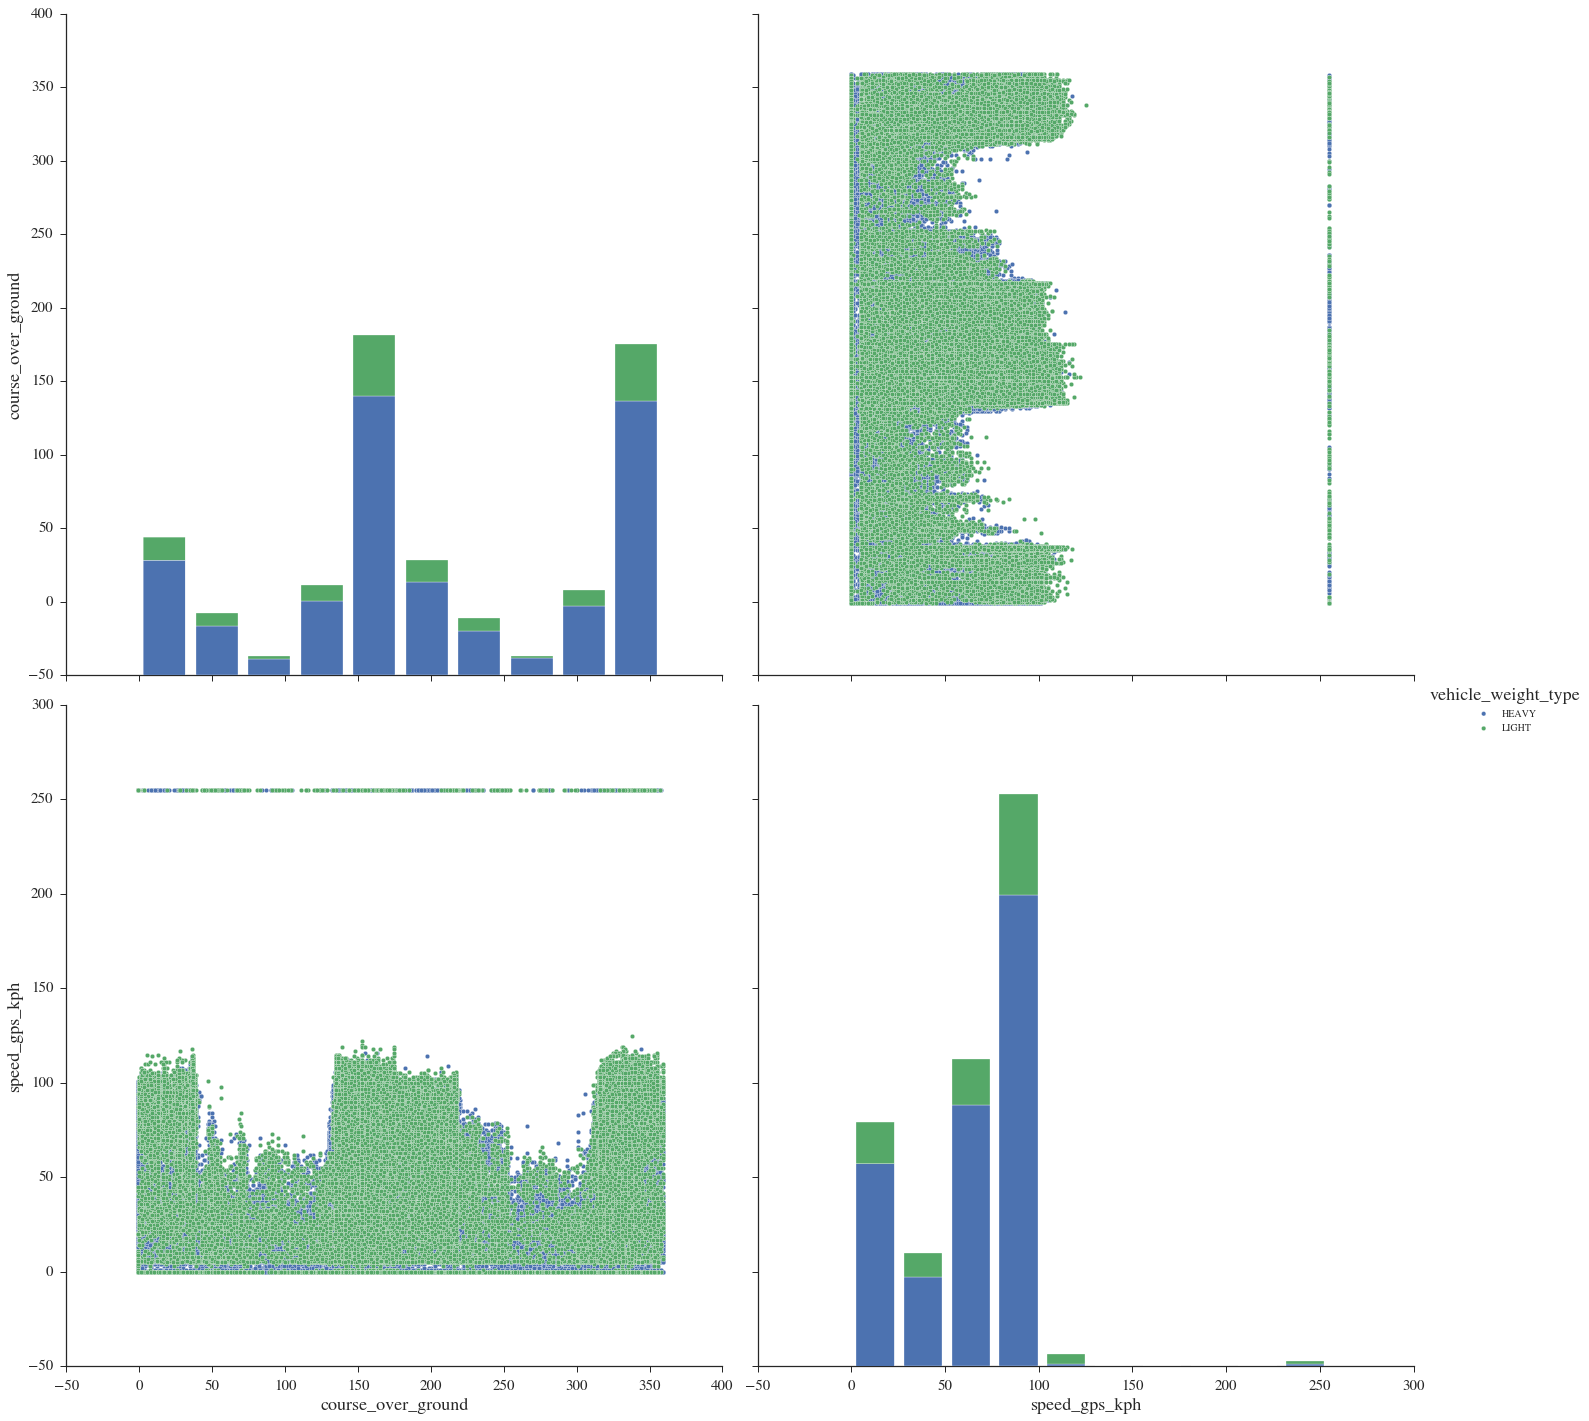

In [31]:
# First a pairplot of all the different features
sns.pairplot(df[[2,5,4]],hue='vehicle_weight_type',size=10)

In [27]:
#df.Class.unique()
#df.dtypes
df.vehicle_weight_type.unique()

array(['HEAVY', 'LIGHT'], dtype=object)

In [10]:
df.dtypes

event_timestamp        object
course_over_ground      int64
machine_id              int64
                       ...   
speed_gps_kph           int64
latitude              float64
longitude             float64
dtype: object

In [48]:
#df['Class'].replace('3', 0, inplace=True)

In classification problems, the **ability to separate classes** from one another is the most important consideration. Histograms of the feature values per class type, can be a useful tool for **eyeballing** some features and to get a rough feeling for their **discriminative power**. 

Here we are visualising the histograms of the two features for each of the two vehicle weight type:

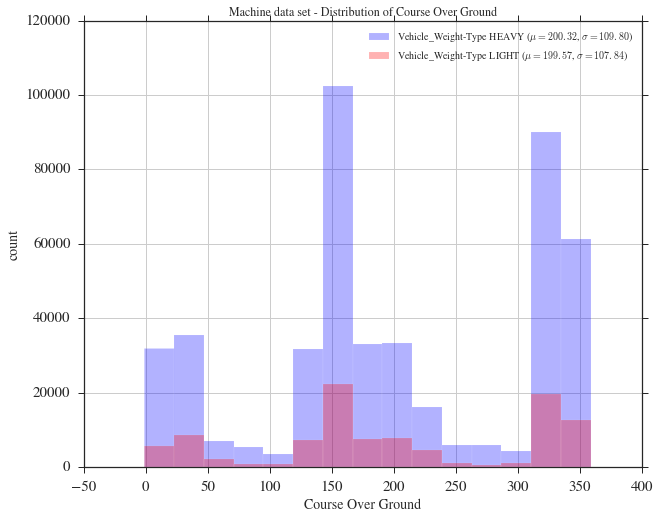

In [56]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10,8))

colors = ('blue', 'red')

for label,color in zip(['HEAVY', 'LIGHT'], colors):
    mean = np.mean(df['course_over_ground'][df['vehicle_weight_type'] == label]) # class sample mean
    stdev = np.std(df['course_over_ground'][df['vehicle_weight_type'] == label]) # class standard deviation
    df['course_over_ground'][df['vehicle_weight_type'] == label].hist(alpha=0.3, # opacity level
             label='Vehicle_Weight-Type {} ($\mu={:.2f}$, $\sigma={:.2f}$)'.format(label, mean, stdev), 
             color=color,
             bins=15)

plt.title('Machine data set - Distribution of Course Over Ground')
plt.xlabel('Course Over Ground', fontsize=14)
plt.ylabel('count', fontsize=14)
plt.legend(loc='upper right')

plt.show()

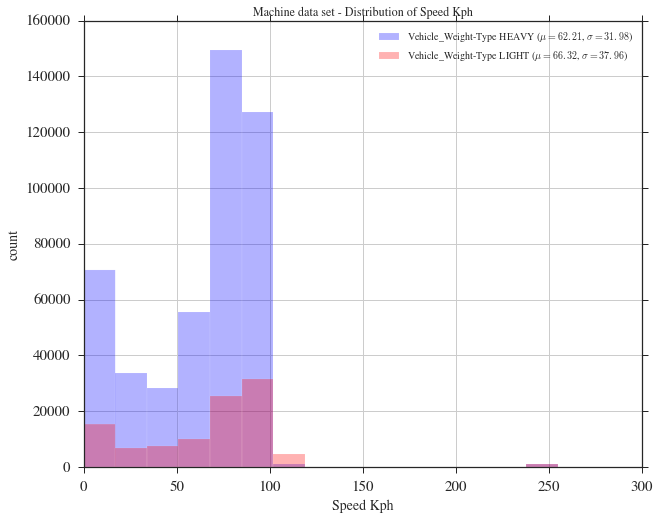

In [58]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10,8))

colors = ('blue', 'red')

for label,color in zip(['HEAVY', 'LIGHT'], colors):
    mean = np.mean(df['speed_gps_kph'][df['vehicle_weight_type'] == label]) # class sample mean
    stdev = np.std(df['speed_gps_kph'][df['vehicle_weight_type'] == label]) # class standard deviation
    df['speed_gps_kph'][df['vehicle_weight_type'] == label].hist(alpha=0.3, # opacity level
             label='Vehicle_Weight-Type {} ($\mu={:.2f}$, $\sigma={:.2f}$)'.format(label, mean, stdev), 
             color=color,
             bins=15)

plt.title('Machine data set - Distribution of Speed Kph')
plt.xlabel('Speed Kph', fontsize=14)
plt.ylabel('count', fontsize=14)
plt.legend(loc='upper right')

plt.show()

### Classifier - Naive Bayes

Because these attributes of course over ground and speed  are independant shown in figures above, we can predict the vehicle type based on these two features

#### Step1 - Splitting the existing data set into a training set and a test set.

If we want to split the dataset into a training and test set with the test set comprising 20% is the dataset, we do as follows:

In [33]:
# split into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['course_over_ground','speed_gps_kph']], df['vehicle_weight_type'], random_state=1, test_size=0.2)
print X_train.shape
print X_test.shape

print y_train.shape
print y_test.shape

(455662, 2)
(113916, 2)
(455662L,)
(113916L,)


#### Step2 - In the training phase, we present each instance from the training set to the classification algorithm.

We can train a Naive Bayes classifier on all our training data as follows:

In [46]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [47]:
classifier = nb.fit(X_train, y_train)

#### Step3 - Comparing the class label produced by the algorithm to the true class label of the record in question.

Since we have traind Naive Bayes classifier on all our training data above, we can now use the model for prediction on the training data set:

In [50]:
y_pred_train = classifier.predict(X_train)
y_pred_train

array(['HEAVY', 'HEAVY', 'HEAVY', ..., 'HEAVY', 'HEAVY', 'HEAVY'], 
      dtype='|S5')

We can find out how well our classifier learned the training dataset based on overall accuracy:

In [51]:
classifier.score(X_train, y_train)

0.81986428536941858

We can generate a more comprehensive accuracy report:

In [52]:
from sklearn import metrics
print metrics.classification_report(y_train, y_pred_train)

             precision    recall  f1-score   support

      HEAVY       0.82      1.00      0.90    373677
      LIGHT       0.47      0.01      0.02     81985

avg / total       0.76      0.82      0.74    455662



#### Step4 - If possible, then we adjust the algorithm's “parameters” to achieve the greatest possible accuracy or, equivalently, the lowest possible error rate.

Not strongly necessary in this classifier.

#### Step5 - The results can be summarized in a so-called confusion matrix whose entries are the number of records in each category.

Let's see what the confusion matrix looks like:

In [53]:
print metrics.confusion_matrix(y_train, y_pred_train)

[[372710    967]
 [ 81114    871]]


#### Step6 - After we have optimized the algorithm using only the training data, we let the classifier operate on the elements of the test set to see how well it classifies them. 

We can now test this classifier on the unseen dataset (test dataset):

In [54]:
y_pred_test = classifier.predict(X_test)
y_pred_test

array(['HEAVY', 'HEAVY', 'HEAVY', ..., 'HEAVY', 'HEAVY', 'HEAVY'], 
      dtype='|S5')

We can find out how well our classifier predicted the test dataset based on overall accuracy:

In [55]:
classifier.score(X_test, y_test)

0.81962147547315567

We can generate a more comprehensive accuracy report:

In [56]:
from sklearn import metrics
print metrics.classification_report(y_test, y_pred_test)

             precision    recall  f1-score   support

      HEAVY       0.82      1.00      0.90     93409
      LIGHT       0.46      0.01      0.02     20507

avg / total       0.76      0.82      0.74    113916



Let's see what the confusion matrix looks like:

In [57]:
print metrics.confusion_matrix(y_test, y_pred_test)

[[93155   254]
 [20294   213]]


#### Step7 - Using different number of folds to test the accuracy of the generalization of your classifiers

If we would prefer to use stratified cross-fold validations, then:

In [58]:
from sklearn.cross_validation import cross_val_score
classifierNB = GaussianNB()
scores = cross_val_score(classifierNB, X_test, y_test, cv=5, scoring='accuracy')
scores

array([ 0.81947858,  0.8193908 ,  0.81916341,  0.82004126,  0.82003336])

The code above uses 5 folds and uses accuracy for a general evaluation metric. The returned result is accuracy for each of the folds.

We can find the mean and standard deviation of all the results:

In [61]:
print 'when k = 5, mean is: ', scores.mean()
print 'when k = 5, STD is: ', scores.std()

when k = 5, mean is:  0.819621495053
when k = 5, STD is:  0.000542769110511


Since in the stratified k-fold cross validation, the k value usually ranges from 5 - 10.
Now Let's uses 10 folds (maxium folds) to test the accuracy of the generalization of Naive classifiers to see whether enhanced or not.

In [60]:
scores = cross_val_score(classifierNB, X_test, y_test, cv=10, scoring='accuracy')
scores

array([ 0.81996138,  0.81899579,  0.82004916,  0.81873244,  0.81908357,
        0.81917135,  0.81978581,  0.82029673,  0.81985778,  0.82028095])

We can find the mean and standard deviation of all the results:

In [62]:
print 'when k = 10, mean is: ', scores.mean()
print 'when k = 10, STD is: ', scores.std()

when k = 10, mean is:  0.819621495053
when k = 10, STD is:  0.000542769110511


We can see from the result that **more folds in stratified cross validation did not improve the performance of the generalization of Naive Bayes classifier**.

#### Step8 - Experimenting with using different combinations of features and observe if the accuracy increases/decreases as we omit some of them

In the future research of richer EROAD dataset, **feature selection** methodology could be implemented in this question.